A partir de los datos de iris:

Ejercicio 1:

- Carga los datos originales
- Utiliza PCA para reducir la dimensionalidad de los datos. No reemplaces X con el resultado, crea una nueva X_pca. Utiliza PCA(2) y otra con PCA(3)
- Utiliza Kmeans para agrupar y predecir las clases de los nuevos datos.
- Compara los resultados para PCA(2) y PCA(3) con las clases originales (y_real).
- ¿Es mejor PCA(2) o PCA(3)?

Ejercicio 2: 

- Repite el proceso con T-SNE y DBSCAN. ¿Cuál da mejores resultados?


In [58]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.cluster import DBSCAN
import numpy as np

In [2]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

# PCA = 2

In [3]:
pca2 = PCA(n_components=2)

In [4]:
x_pca2 = pca2.fit_transform(x)
x_pca2.shape

(150, 2)

In [5]:
print('pca2.explained_variance_ratio_ =', pca2.explained_variance_ratio_)

pca2.explained_variance_ratio_ = [0.92461872 0.05306648]


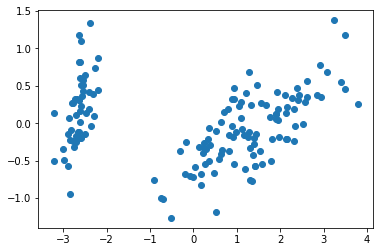

In [6]:
plt.scatter(x_pca2[:,0],x_pca2[:,1]);

In [7]:
lista_inercia = []
lista_kmeans = []
lista_sil = []
for nc in range(2,8):
    globals()['kmeans_pca2_c%s' % nc] = KMeans(n_clusters=nc, random_state=42).fit(x_pca2)
    lista_inercia.append(globals()['kmeans_pca2_c%s' % nc].inertia_)
    lista_sil.append(silhouette_score(x_pca2, globals()['kmeans_pca2_c%s' % nc].labels_))
    lista_kmeans.append(nc)

In [8]:
lista_inercia

[137.15530112818416,
 63.81994202200124,
 42.22517564743002,
 33.480235063216476,
 26.12959354919589,
 22.040908240189058]

In [9]:
lista_kmeans

[2, 3, 4, 5, 6, 7]

In [10]:
lista_sil

[0.7056703225102109,
 0.5976764219547991,
 0.5577409232246783,
 0.5515547785513799,
 0.44412097601443284,
 0.4335181949227466]

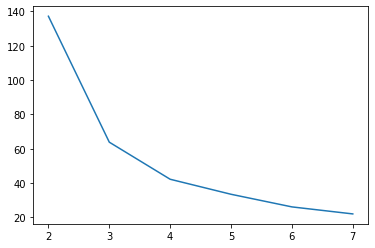

In [11]:
plt.plot(lista_kmeans, lista_inercia);

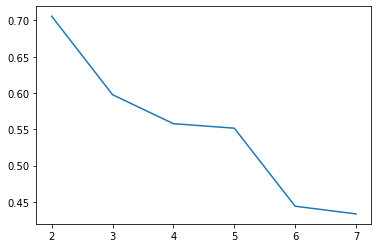

In [12]:
plt.plot(lista_kmeans, lista_sil);

## El número de clusters debería estar entre 2 y 3

In [13]:
score_kmeans_c2 = kmeans_pca2_c2.score(x_pca2) 
score_kmeans_c3 = kmeans_pca2_c3.score(x_pca2)

In [14]:
score_kmeans_c2

-137.15530112818416

In [15]:
score_kmeans_c3

-63.81994202200124

## Mejor score para n_clusters = 3

In [65]:
y_pred_pca2_c3 = kmeans_pca2_c3.predict(x_pca2)
y_pred_pca2_c3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [55]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Antes de medir la accuracy, se deben corresponder los valores del target (y) con los de los clusters asignados.

In [59]:
condicion = [(y == 0), 
    (y == 1),
    (y == 2)]
encoding = [1, 2, 0]
y_real_pca2 = np.select(condicion, encoding)
y_real_pca2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Ahora calculamos la accuracy

In [68]:
accuracy_kmeans_pca2 = accuracy_score(y_pred_pca2_c3, y_real_pca2)
accuracy_kmeans_pca2

0.8866666666666667

---

# PCA = 3

In [16]:
pca3 = PCA(n_components=3)

In [17]:
x_pca3 = pca3.fit_transform(x)
x_pca3.shape

(150, 3)

In [18]:
print('pca3.explained_variance_ratio_ =', pca3.explained_variance_ratio_)

pca3.explained_variance_ratio_ = [0.92461872 0.05306648 0.01710261]


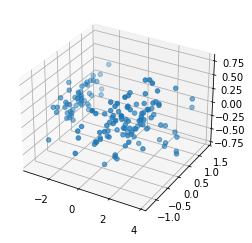

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca3[:,0], x_pca3[:,1], x_pca3[:,2]);

In [20]:
lista_inercia_pca3 = []
lista_kmeans_pca3 = []
lista_sil_pca3 = []
for nc in range(2,8):
    globals()['kmeans_pca3_c%s' % nc] = KMeans(n_clusters=nc, random_state=42).fit(x_pca3)
    lista_inercia_pca3.append(globals()['kmeans_pca3_c%s' % nc].inertia_)
    lista_sil_pca3.append(silhouette_score(x_pca2, globals()['kmeans_pca3_c%s' % nc].labels_))
    lista_kmeans_pca3.append(nc)

In [21]:
lista_inercia_pca3

[148.79893436516974,
 75.31893784137085,
 53.75238528149716,
 43.245715298825445,
 35.84267708079659,
 31.075959971402735]

In [22]:
lista_kmeans_pca3

[2, 3, 4, 5, 6, 7]

In [23]:
lista_sil_pca3

[0.7056703225102109,
 0.5987948388984353,
 0.5609574019832674,
 0.5361987982130929,
 0.4293554660975993,
 0.4300080903008813]

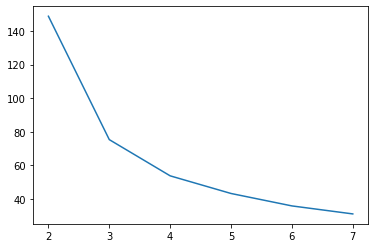

In [24]:
plt.plot(lista_kmeans_pca3, lista_inercia_pca3);

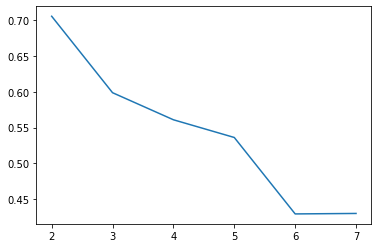

In [25]:
plt.plot(lista_kmeans_pca3, lista_sil_pca3);

## El número de clusters debería estar entre 2 y 3

In [26]:
score_kmeans_c2_pca3 = kmeans_pca3_c2.score(x_pca3) 
score_kmeans_c3_pca3 = kmeans_pca3_c3.score(x_pca3)

In [27]:
score_kmeans_c2_pca3

-148.79893436516974

In [28]:
score_kmeans_c3_pca3

-75.31893784137085

## Mejor score con n_clusters = 3

In [63]:
y_pred_pca3_c3 = kmeans_pca3_c3.predict(x_pca3)
y_pred_pca3_c3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [66]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Antes de medir la accuracy, se deben corresponder los valores del target (y) con los de los clusters asignados.

In [67]:
condicion = [(y == 0), 
    (y == 1),
    (y == 2)]
encoding = [1, 0, 2]
y_real_pca3 = np.select(condicion, encoding)
y_real_pca3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [69]:
accuracy_kmeans_pca3 = accuracy_score(y_pred_pca3_c3, y_real_pca3)
accuracy_kmeans_pca3

0.8933333333333333

## Comparación de accuracies

In [71]:
print('accuracy_kmeans_pca2:', accuracy_kmeans_pca2)
print('accuracy_kmeans_pca3:', accuracy_kmeans_pca3)

accuracy_kmeans_pca2: 0.8866666666666667
accuracy_kmeans_pca3: 0.8933333333333333


# PCA=3 tiene mejor accuracy que PCA=2

---
---
---
---
---
---

# T-SNE y DBScan

# T-SNE = 2

In [29]:
tsne2 = TSNE(n_components=2, random_state=42)

In [30]:
x_tsne2 = tsne2.fit_transform(x)
x_tsne2.shape

(150, 2)

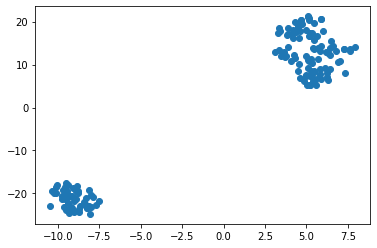

In [31]:
plt.scatter(x_tsne2[:,0],x_tsne2[:,1]);

In [32]:
db_tsne2 = DBSCAN(eps=1.2, min_samples=5).fit(x_tsne2)

In [33]:
db_tsne2.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        2,  2,  2,  2,  1,  2,  2,  2,  2,  2,  2,  1,  1,  2,  2,  2,  2,
        1,  2,  1,  2,  1,  2,  2,  1,  1,  2,  2,  2,  2,  2,  1,  2,  2,
        2,  2,  1,  2,  2,  2,  1,  2,  2,  2,  1,  2,  2,  1],
      dtype=int64)

In [34]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
y_pred_tsn2 = db_tsne2.fit_predict(x_tsne2)

In [73]:
accuracy_tsn2 = accuracy_score(y_pred_tsn2, y)
accuracy_tsn2

0.8933333333333333

# T-SNE = 3

In [37]:
tsne3 = TSNE(n_components=3, random_state=42)

In [38]:
x_tsne3 = tsne3.fit_transform(x)
x_tsne3.shape

(150, 3)

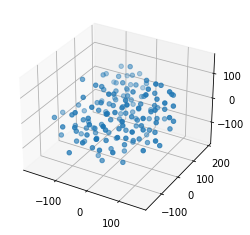

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_tsne3[:,0], x_tsne3[:,1], x_tsne3[:,2]);

In [40]:
db_tsne3 = DBSCAN(eps=50.5, min_samples=6).fit(x_tsne3)

In [41]:
db_tsne3.labels_

array([ 0,  0,  0,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0, -1, -1, -1, -1,
        0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1, -1,
       -1,  0,  0,  0, -1,  0,  0, -1,  0,  0, -1,  0, -1, -1,  0, -1, -1,
        1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  2,  1,
        2, -1, -1,  2,  1,  2,  2,  2,  1,  1,  2, -1,  1,  3,  1, -1,  2,
       -1,  2,  1,  2,  1, -1,  2,  1,  1,  1,  2,  2, -1,  2,  1, -1,  2,
        3, -1,  1, -1,  2, -1, -1,  2,  2,  3,  1, -1,  3,  1],
      dtype=int64)

In [42]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [43]:
y_pred_tsn3 = db_tsne3.fit_predict(x_tsne3)
y_pred_tsn3

array([ 0,  0,  0,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0, -1, -1, -1, -1,
        0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1, -1,
       -1,  0,  0,  0, -1,  0,  0, -1,  0,  0, -1,  0, -1, -1,  0, -1, -1,
        1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  2,  1,
        2, -1, -1,  2,  1,  2,  2,  2,  1,  1,  2, -1,  1,  3,  1, -1,  2,
       -1,  2,  1,  2,  1, -1,  2,  1,  1,  1,  2,  2, -1,  2,  1, -1,  2,
        3, -1,  1, -1,  2, -1, -1,  2,  2,  3,  1, -1,  3,  1],
      dtype=int64)

In [72]:
accuracy_tsn3 = accuracy_score(y_pred_tsn3, y)
accuracy_tsn3

0.5733333333333334

## Comparando scores con T-SNE

In [74]:
print('accuracy_tsn2:', accuracy_tsn2)
print('accuracy_tsn3:', accuracy_tsn3)

accuracy_tsn2: 0.8933333333333333
accuracy_tsn3: 0.5733333333333334


## T-SNE=2 tiene mucha mejor accuracy que T-SNE=3